# Artificial Intelligence Course 2023 
Exersice 1 - Genetic Algorithm - KnapSack Problem

# Mohammad Taha Majlesi 
810101504



<html>
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: 600px; vertical-align: middle; height: 40px; margin: 10px;">
<h1 style="font-family: Georgia; color: white;">Artificial Intelligence Course 2023  CA1 </h1>
</div>
<div style="background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: 500px; margin: 10px;">
  <img src="https://upload.wikimedia.org/wikipedia/en/thumb/f/fd/University_of_Tehran_logo.svg/225px-University_of_Tehran_logo.svg.png" width=60px width=auto style="padding:10px; vertical-align: middle;">
  <span style="font-family: Georgia; font-size:30px; color: black;">University of Tehran </span>
</div>
<div style=" background-image: linear-gradient(to left, rgb(255, 255, 255), rgb(138, 136, 136)); width: 400px; height: 30px; margin: 10px;">
  <span style="font-family: Georgia; font-size:15pt; color: black; vertical-align: middle;">Taha Majlesi - std id: 810101504 </span>
</div>
</html>

## Introduction

![](Screenshot%202024-03-05%20at%201.18.58%E2%80%AFAM.png)

## Explanation

![](Screenshot%202024-03-05%20at%201.19.47%E2%80%AFAM.png)

## reading the CSV file

At first we need read CSV file and convert it to a list of dictionaries. 
Then we can use this list to create our population.


In [762]:
import csv

def read_csv(file_name):
    with open(file_name, mode='r') as file:
        csv_reader = csv.reader(file)
        data = []
        csv_reader.__next__()
        for row in csv_reader:
            data.append((row[0], int(row[1]), int(row[2])))
    return data


Show the items in the CSV file by plotting them.

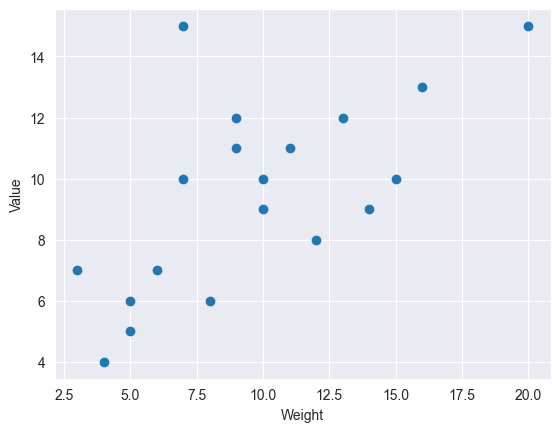

In [654]:
items = read_csv('snacks.csv')


def plot_items(items):
    x = [item[1] for item in items]
    y = [item[2] for item in items]
    plt.scatter(x, y)
    plt.xlabel('Weight')
    plt.ylabel('Value')
    plt.show()

plot_items(items)

In [655]:
for item in items:
    print(' .  ',item[0] , item[1] , item[2])

 .   MazMaz 10 10
 .   Doogh-e-Abali 15 10
 .   Nani 5 5
 .   Jooj 7 15
 .   Hot-Dog 20 15
 .   Chips 8 6
 .   Nooshaba 12 8
 .   Shokolat 6 7
 .   Chocoroll 9 12
 .   Cookies 11 11
 .   Abnabat 4 4
 .   Adams-Khersi 14 9
 .   Popcorn 16 13
 .   Pastil 3 7
 .   Tordilla 10 9
 .   Masghati 5 6
 .   Ghottab 7 10
 .   Saghe-Talaei 9 11
 .   Choob-Shoor 13 12


## Define DNA class


Define DNA by class  for each item in the list.
this class contain the weight , value , name and proportion of each item and some methods to compare and hash the items.

In [763]:
class DNA :
    def __init__(self, weight , value ,name ,proportion):
        self.proportion = proportion
        self.name = name
        self.value = value
        self.weight = weight
    
    def __str__(self):
        return f'{self.name} : {self.proportion}'
    
    def __repr__(self):
        return f'{self.name} : {self.proportion}'
    
    def __eq__(self, other):
        return self.name == other.name
    
    def __hash__(self):
        return hash(self.name)

        

## CONSTANTS VALUES

In [816]:
POPULATION_SIZE = 1000
MAX_WEIGHT = 9.9
MIN_VALUE = 12
NUM_ITEMS_RANGE = (2, 4)
MUTATION_RATE = 0.1
GENERATIONS = 1150
CROSSOWER_PROBABILITY = 0.5



In [817]:
import random


## Generate initial population

we generate a list of random chromosomes with random proportion .
we define that populations in POPULATION_SIZE and NUM_ITEMS_RANGE for each individual.
and for each individual we select a random number of items between NUM_ITEMS_RANGE[0] and NUM_ITEMS_RANGE[1].

In [818]:
def generate_population():
    population = []
    for _ in range(POPULATION_SIZE):
        elements = random.sample(items, k=random.randint(NUM_ITEMS_RANGE[0], NUM_ITEMS_RANGE[1]))
        population.append([ DNA(elements[i][1], elements[i][2], elements[i][0],random.uniform(0, 1))  for i in range(len(elements))])
    return population



In [819]:
population = generate_population()

## Plot the population sample

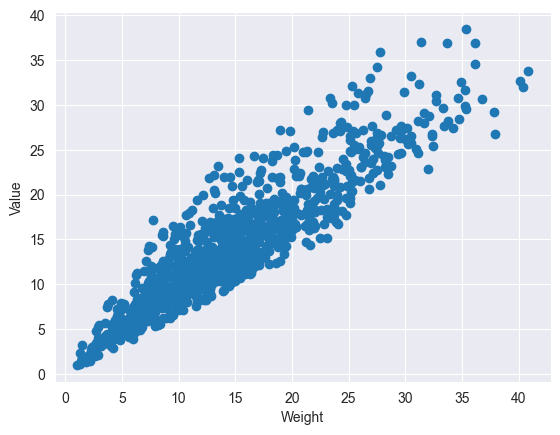

In [820]:
import matplotlib.pyplot as plt

def plot_population(population):
    x = [sum((ind.weight) * (ind.proportion) for ind in individual) for individual in population]
    y = [sum((ind.value) * (ind.proportion) for ind in individual) for individual in population]
    plt.scatter(x, y)
    plt.xlabel('Weight')
    plt.ylabel('Value')
    plt.show()

plot_population(population)

we can see that the population is random and not optimized.
and its Uniformly distributed.

## Fitness function

The fitness function is the total value of the items in the knapsack.
and in the end we will check if the weight is less than the maximum weight and the value is more than the minimum value.

In [821]:
def fit_function(individual):
    total_weight = sum((ind.weight) * (ind.proportion) for ind in individual)
    total_value = sum((ind.value) * (ind.proportion) for ind in individual)
    
    sum_bad = 1
    
    
    if total_weight > MAX_WEIGHT :
        sum_bad =  10*(total_weight - MAX_WEIGHT) +sum_bad
    if total_value < MIN_VALUE :
        sum_bad = 2*(MIN_VALUE - total_value) +sum_bad
    if len(tuple(individual)) < NUM_ITEMS_RANGE[0] or len(tuple(individual)) > NUM_ITEMS_RANGE[1]:
        sum_bad = 10*(len(tuple(individual)) - NUM_ITEMS_RANGE[1]) +sum_bad
    
    for ind in tuple(individual):
        if individual.count(ind) > 1:
            sum_bad = 100000*individual.count(ind) +sum_bad
    return sum_bad

In [822]:
def fitness(individual):
    # total_weight = sum((ind.weight) * (ind.proportion) for ind in individual)
    total_value = sum((ind.value) * (ind.proportion) for ind in individual)
    
    return total_value / fit_function(individual)

## Selection

selection is based on the fitness of each individual.
it can help us to select the best individuals for the next generation.

if the total fitness is zero we will return None.
because we can not select any individual and the process will be stopped.

In [823]:
def select(population):
    total_fitness = sum(fitness(individual) for individual in population)
    if total_fitness == 0:
        return None
    
    selection_probs = [(fitness(individual) / total_fitness) for individual in population]
    selected = random.choices(population, weights=selection_probs, k=len(population))
    return selected

## Crossover

In [824]:

def crossover(parent1, parent2):
    child1 = []
    child2 = []
    
    point = random.randint(1, len(parent1) - 1)
    child1.extend(parent1[:point])
    child1.extend(parent2[point:])
    child2.extend(parent2[:point])
    child2.extend(parent1[point:])
    
    
    return child1, child2


## Mutation

In [825]:
# Perform mutation
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i].proportion = random.uniform(0, 1)
    return individual

## Genetic algorithm

In [826]:
# Genetic algorithm
def genetic_algorithm():
    population_fitness = []
    population = generate_population()
    
    for _ in range(GENERATIONS):
        
        
        for i in range((len(population)//2)-2):
            pair1 , pair2 = crossover(population[i], population[2*i+1])
            population[i] = pair1
            population[2*i+1] = pair2
            # print(fitness(population[i]) , fitness(population[2*i+1]))

        new_population = select(population)
        population_fitness.append( sum(fitness(individual) for individual in population) )
        
        if new_population is None:
            return None
        population = new_population
    new__population = []
    for individual in population:
        if sum((ind.weight) * (ind.proportion) for ind in individual) <= MAX_WEIGHT and sum((ind.value) * (ind.proportion) for ind in individual) >= MIN_VALUE:
            new__population.append(individual)
    if len(new__population) == 0:
        return None , None
    return max(population, key=fitness) , population_fitness

## Example usage

In [835]:
best_individual , population_fitness = genetic_algorithm()
if best_individual is None:
    print("No solution found")
else:
    print("Fitness of best individual: ", fitness(best_individual))
    print("--------------------")
    print("Total weight: ", sum((ind.weight) * (ind.proportion) for ind in best_individual))
    print("Total value: ", sum((ind.value) * (ind.proportion) for ind in best_individual))
    print("--------------------")
    print("Items in the knapsack:")
    for ind in best_individual:
        print(ind.name , "weight: ", ind.weight*ind.proportion, "value: ", ind.value*ind.proportion)

Fitness of best individual:  21.712960567437463
--------------------
Total weight:  9.870673774489191
Total value:  21.712960567437463
--------------------
Items in the knapsack:
Pastil weight:  2.947963016043274 value:  6.878580370767639
Jooj weight:  6.922710758445918 value:  14.834380196669825


## Plot the fitness of the population

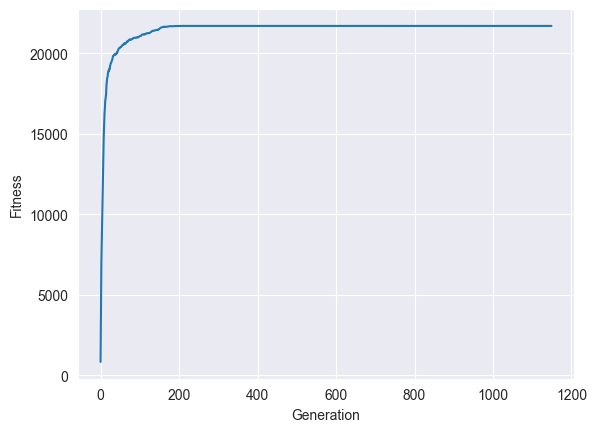

In [836]:
if population_fitness is None:
    print("No solution found")
else:
    import matplotlib.pyplot as plt
    plt.plot(population_fitness)
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.show()


# Calculates Final Weight and Value by the best individual
now we can calculate the total weight and value of the best individual 
. sort the items by the value/weight ratio and then select the best items to put in the knapsack.

In [829]:
serted_item_list = sorted(items, key=lambda x: x[2]/x[1], reverse=True)
for item in serted_item_list:
    print(' .  ',item[0] , item[1] , item[2])

 .   Pastil 3 7
 .   Jooj 7 15
 .   Ghottab 7 10
 .   Chocoroll 9 12
 .   Saghe-Talaei 9 11
 .   Masghati 5 6
 .   Shokolat 6 7
 .   MazMaz 10 10
 .   Nani 5 5
 .   Cookies 11 11
 .   Abnabat 4 4
 .   Choob-Shoor 13 12
 .   Tordilla 10 9
 .   Popcorn 16 13
 .   Hot-Dog 20 15
 .   Chips 8 6
 .   Doogh-e-Abali 15 10
 .   Nooshaba 12 8
 .   Adams-Khersi 14 9


Best items with weight and value that need to be put in the knapsack

In [830]:
best_value =0
weight = 0

for item in serted_item_list :
    if weight + item[1] <= MAX_WEIGHT:
        print(' .  ',item[0] , item[1] , item[2])
        weight += item[1]
        best_value += item[2]
    else:
        print(' .  ',item[0] , (MAX_WEIGHT - weight) /item[1]  * item[1]  , (MAX_WEIGHT - weight) /item[1]* item[2] )
        best_value += ((MAX_WEIGHT - weight) /item[1]) * item[2]
        weight+= ((MAX_WEIGHT - weight) /item[1]) * item[1]
        break
print('best value : ',best_value)
print('best weight : ',weight)

 .   Pastil 3 7
 .   Jooj 6.9 14.785714285714286
best value :  21.785714285714285
best weight :  9.9


# Question Answers :

# Question 1 :
what is problem of low and high initial population size?

Low initial population size can cause the algorithm to get stuck in a local minimum. and high initial population size can cause the algorithm to be slow and consume a lot of resources


# Question 2 :
if population size increase in each generation, what is the problem?

If the population size increases in each generation, the algorithm will be slow and consume a lot of resources.
and accuracy of the algorithm will be decreased.



# Question 3 :

compare the effect of mutation rate on the algorithm performance. can we use just mutation or crossover?

Mutation rate is the probability of a gene being mutated. A high mutation rate can cause the algorithm to converge slowly, and a low mutation rate can cause the algorithm to get stuck in a local minimum. We can use just mutation or crossover, but using both will increase the accuracy of the algorithm.


# Question 4 :

what is your suggestion to solve the problem of premature convergence?




# Question 5 :

by this method maybe after some generation we get the same result, what is the problem and how to solve it?

The problem is that the algorithm gets stuck in a local minimum. We can solve this problem by increasing the mutation rate or using a different selection method.


# Question 6 :

what is your idea to finish program if we dont have any solution?

We can finish the program if the fitness of the best individual is zero or if the fitness of the best individual is not increasing after a certain number of generations.
or in the last generation we can check if the best individual is not in the range of the problem we can finish the program and return None.
for showing the user that there is no solution for this problem.